In [2]:
# First, let's install/upgrade required packages
!pip install --upgrade seaborn matplotlib pandas numpy

# Now import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style - using a different style that's definitely available
plt.style.use('default')  # This is safer than 'seaborn' style
%matplotlib inline

# Configure seaborn style directly
sns.set_theme()  # This is the better way to set seaborn styling

print('Libraries imported successfully!')

Libraries imported successfully!


In [5]:
# Load and examine the dataset
# Read the events data
events_df = pd.read_csv('../data/events.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print("-" * 50)
print(f"Number of rows: {events_df.shape[0]:,}")
print(f"Number of columns: {events_df.shape[1]}")
print("\nColumns in the dataset:")
print(events_df.columns.tolist())

# Display first few rows
print("\nFirst few rows of the data:")
display(events_df.head())

# Check for missing values
print("\nMissing values in the dataset:")
display(events_df.isnull().sum())

# Get event type distribution
print("\nEvent type distribution:")
event_counts = events_df['event'].value_counts()  # Changed from 'event_type' to 'event'
display(event_counts)
print("\nPercentage distribution:")
display(event_counts / len(events_df) * 100)

# Let's also convert the timestamp to datetime for better analysis
events_df['timestamp'] = pd.to_datetime(events_df['timestamp'], unit='ms')
print("\nTimestamp range:")
print(f"Start: {events_df['timestamp'].min()}")
print(f"End: {events_df['timestamp'].max()}")

Dataset Overview:
--------------------------------------------------
Number of rows: 2,756,101
Number of columns: 5

Columns in the dataset:
['timestamp', 'visitorid', 'event', 'itemid', 'transactionid']

First few rows of the data:


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN



Missing values in the dataset:


timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64


Event type distribution:


event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64


Percentage distribution:


event
view           96.669607
addtocart       2.515583
transaction     0.814810
Name: count, dtype: float64


Timestamp range:
Start: 2015-05-03 03:00:04.384000
End: 2015-09-18 02:59:47.788000


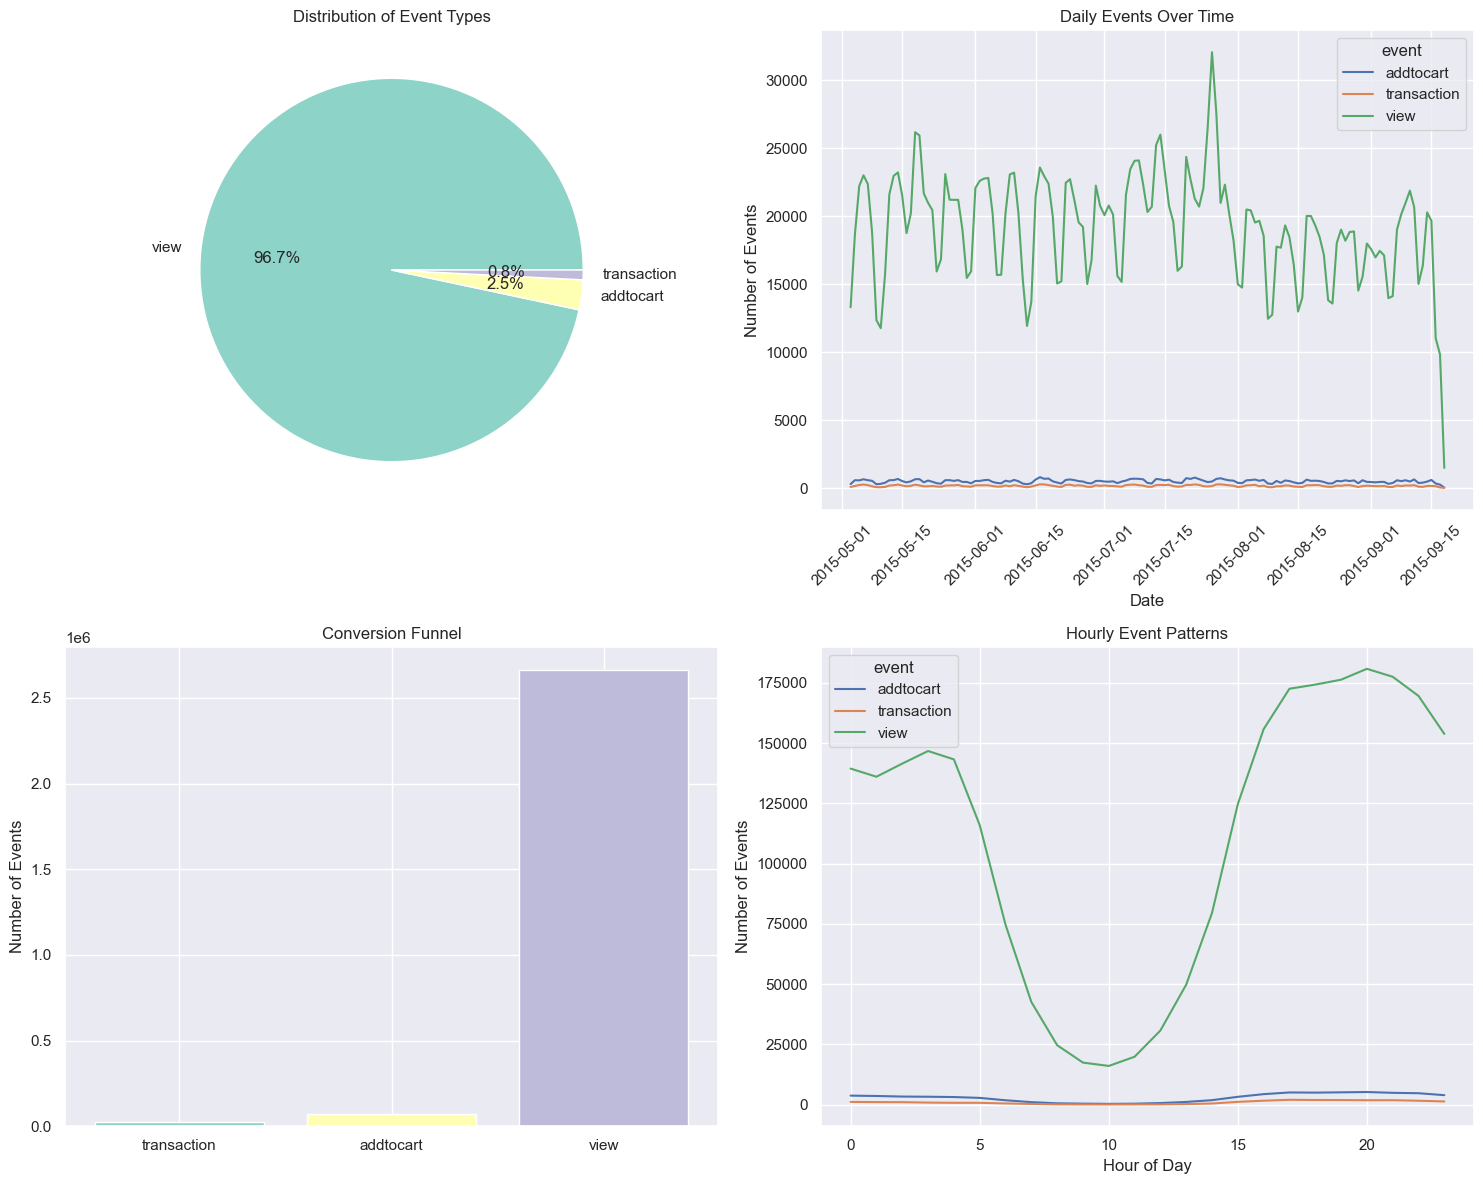


Key Metrics:
--------------------------------------------------
Cart to View Rate: 2.60%
Purchase to Cart Rate: 32.39%
Purchase to View Rate: 0.84%

Unique Users: 1,407,580
Unique Items: 235,061
Average Events per User: 1.96

Average Daily Events: 19828
Busiest Day: 2015-07-26 with 32703 events
Slowest Day: 2015-09-18 with 1528 events


In [6]:
# Create visualizations for event distribution and user behavior
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Event Distribution Pie Chart
event_counts = events_df['event'].value_counts()
ax1.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
ax1.set_title('Distribution of Event Types')

# 2. Daily Events Timeline
daily_events = events_df.groupby([events_df['timestamp'].dt.date, 'event']).size().unstack()
daily_events.plot(ax=ax2)
ax2.set_title('Daily Events Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Events')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# 3. Conversion Funnel
funnel_data = event_counts.iloc[::-1]  # Reverse order for funnel
ax3.bar(range(len(funnel_data)), funnel_data, color=sns.color_palette('Set3'))
ax3.set_title('Conversion Funnel')
ax3.set_xticks(range(len(funnel_data)))
ax3.set_xticklabels(funnel_data.index)
ax3.set_ylabel('Number of Events')

# 4. Hourly Pattern
events_df['hour'] = events_df['timestamp'].dt.hour
hourly_events = events_df.groupby(['hour', 'event']).size().unstack()
hourly_events.plot(ax=ax4)
ax4.set_title('Hourly Event Patterns')
ax4.set_xlabel('Hour of Day')
ax4.set_ylabel('Number of Events')

plt.tight_layout()
plt.show()

# Calculate some key metrics
print("\nKey Metrics:")
print("-" * 50)

# 1. Conversion Rates
cart_to_view_rate = (event_counts['addtocart'] / event_counts['view']) * 100
purchase_to_cart_rate = (event_counts['transaction'] / event_counts['addtocart']) * 100
purchase_to_view_rate = (event_counts['transaction'] / event_counts['view']) * 100

print(f"Cart to View Rate: {cart_to_view_rate:.2f}%")
print(f"Purchase to Cart Rate: {purchase_to_cart_rate:.2f}%")
print(f"Purchase to View Rate: {purchase_to_view_rate:.2f}%")

# 2. User Activity Metrics
unique_users = events_df['visitorid'].nunique()
unique_items = events_df['itemid'].nunique()
avg_events_per_user = len(events_df) / unique_users

print(f"\nUnique Users: {unique_users:,}")
print(f"Unique Items: {unique_items:,}")
print(f"Average Events per User: {avg_events_per_user:.2f}")

# 3. Daily Activity
events_per_day = daily_events.sum(axis=1)
print(f"\nAverage Daily Events: {events_per_day.mean():.0f}")
print(f"Busiest Day: {events_per_day.idxmax()} with {events_per_day.max():.0f} events")
print(f"Slowest Day: {events_per_day.idxmin()} with {events_per_day.min():.0f} events")

In [ ]:
# Key Insights from Data Analysis

## 1. Event Distribution and Funnel Analysis
- Views dominate at 96.7% of all events (2.66M views)
- Cart conversion rate of 2.60% (view → add to cart) is relatively low
- Strong purchase rate from cart at 32.39% (cart → purchase)
- Overall purchase rate of 0.84% (view → purchase) suggests opportunity for funnel optimization

## 2. User Engagement Patterns
- Large user base (1.4M unique visitors)
- Wide product catalog (235K items)
- Low average events per user (1.96) suggests many one-time visitors
- Opportunity to improve user retention and engagement

## 3. Temporal Patterns
- Daily traffic shows regular weekly patterns
- Significant spike on July 26, 2015 (32,703 events) - worth investigating
- Sharp decline towards September 18 (1,528 events) needs investigation
- Hourly pattern shows:
  - Peak activity during evening hours (15:00-21:00)
  - Lowest activity during early morning hours (3:00-6:00)
  - Clear business hours pattern suggesting B2C focus

## Recommendations for the Recommendation System

1. **Focus Areas**:
   - Improve view-to-cart conversion (currently 2.60%)
   - Maintain strong cart-to-purchase rate (32.39%)
   - Target returning user engagement (low 1.96 events/user)

2. **Timing Strategies**:
   - Prioritize recommendations during peak hours (15:00-21:00)
   - Test different recommendation strategies for high/low traffic periods

3. **User Segmentation**:
   - Separate strategies for one-time vs returning visitors
   - Analyze successful conversion patterns from July 26 spike